<a href="https://colab.research.google.com/github/Roymundus/BigData/blob/main/UAS_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

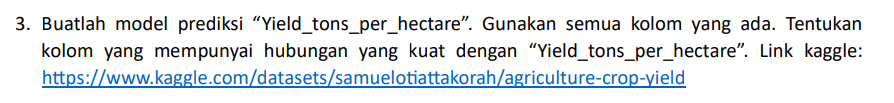

# Download Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelotiattakorah/agriculture-crop-yield")

print("Path to dataset files:", path)

100%|██████████| 33.4M/33.4M [00:00<00:00, 59.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Prediction-Agriculture-Crop-Yield').getOrCreate()

In [ ]:
spark

In [ ]:
df_spark = spark.read.csv(path, header = True, inferSchema = True)

df_spark.show()

+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|Region|Soil_Type|   Crop|       Rainfall_mm|Temperature_Celsius|Fertilizer_Used|Irrigation_Used|Weather_Condition|Days_to_Harvest|Yield_tons_per_hectare|
+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|  West|    Sandy| Cotton| 897.0772391101236| 27.676966373377603|          false|           true|           Cloudy|            122|     6.555816258223593|
| South|     Clay|   Rice| 992.6732816189208|  18.02614225436302|           true|           true|            Rainy|            140|       8.5273409063236|
| North|     Loam| Barley| 147.9980252926104|  29.79404241557257|          false|          false|            Sunny|            106|     1.127443335982929|
| North|    Sandy|Soybean| 986.8663313367325|  16.64419019137728|     

## Atribut Dataset

1. Region: Wilayah geografis tempat tanaman ditanam (North, East, South, West).
2. Soil_type: Jenis tanah tempat tanaman ditanam (Clay, Sandy, Loam, Silt, Peaty, Chalky).
3. Crop: Jenis tanaman yang ditanam (Wheat, Rice, Maize, Barley, Soybean, Cotton).
4. Rainfall_mm: Jumlah curah hujan yang diterima dalam milimeter selama periode pertumbuhan tanaman.
5. Temperature_Celsius: Suhu rata-rata selama periode pertumbuhan tanaman, diukur dalam derajat Celsius.
6. Fertilizer_Used: Menunjukkan apakah pupuk telah diterapkan (Benar = Ya, Salah = Tidak).
7. Irrigation_Used: Menunjukkan apakah irigasi digunakan selama periode pertumbuhan tanaman (True = Ya, False = Tidak).
8. Weather_Condition: Kondisi cuaca yang dominan selama musim tanam (Sunny, Rainy, Cloudy).
9. Days_to_Harvest: Jumlah hari yang dibutuhkan agar tanaman dapat dipanen setelah penanaman.
10. Yield_tons_per_hectare: Total hasil panen yang dihasilkan, diukur dalam ton per hektar.

# Data Frame

In [ ]:
 df_spark.printSchema()

root
 |-- Region: string (nullable = true)
 |-- Soil_Type: string (nullable = true)
 |-- Crop: string (nullable = true)
 |-- Rainfall_mm: double (nullable = true)
 |-- Temperature_Celsius: double (nullable = true)
 |-- Fertilizer_Used: boolean (nullable = true)
 |-- Irrigation_Used: boolean (nullable = true)
 |-- Weather_Condition: string (nullable = true)
 |-- Days_to_Harvest: integer (nullable = true)
 |-- Yield_tons_per_hectare: double (nullable = true)



In [ ]:
df_spark.count() #number of rows

1000000

In [ ]:
len(df_spark.columns) #number of columns

10

In [ ]:
df_spark.dtypes

[('Region', 'string'),
 ('Soil_Type', 'string'),
 ('Crop', 'string'),
 ('Rainfall_mm', 'double'),
 ('Temperature_Celsius', 'double'),
 ('Fertilizer_Used', 'boolean'),
 ('Irrigation_Used', 'boolean'),
 ('Weather_Condition', 'string'),
 ('Days_to_Harvest', 'int'),
 ('Yield_tons_per_hectare', 'double')]

In [ ]:
df_spark.summary().show()

+-------+-------+---------+-------+------------------+-------------------+-----------------+------------------+----------------------+
|summary| Region|Soil_Type|   Crop|       Rainfall_mm|Temperature_Celsius|Weather_Condition|   Days_to_Harvest|Yield_tons_per_hectare|
+-------+-------+---------+-------+------------------+-------------------+-----------------+------------------+----------------------+
|  count|1000000|  1000000|1000000|           1000000|            1000000|          1000000|           1000000|               1000000|
|   mean|   NULL|     NULL|   NULL|  549.981900729366| 27.504965199661616|             NULL|        104.495025|      4.64947248766303|
| stddev|   NULL|     NULL|   NULL|259.85132027823227|  7.220607587682008|             NULL|25.953412277174294|     1.696572451116516|
|    min|   East|   Chalky| Barley|100.00089622522204| 15.000034141430271|           Cloudy|                60|    -1.147613222534901|
|    25%|   NULL|     NULL|   NULL|324.89548331450317| 

1. **Rainfall_mm**: Data Rainfall tersebar merata antara 100 hingga 999 mm
2. **Temperature_Celcius**: Suhu berkisar antara 15 hingga 40°C, dengan rata-rata mendekati 28°C.
3. **Days_to_Harvest**: Hari menuju panen berkisar antara 60 hingga 149 hari dengan rata-rata 104 hari.
4. **Yields_tons_per_hectare**: Nilai hasil panen ada yang negatif (-1.14), yang mungkin menunjukkan ketidaksesuaian atau kesalahan pada data, sehingga diperlukan penanganan lebih lanjut.

# Data Preparation

In [ ]:
from pyspark.sql.functions import col

# Filter data where Yield_tons_per_hectare is less than 0
negative_yield_df = df_spark.filter(col("Yield_tons_per_hectare") < 0)

# Show the data
negative_yield_df.show()

# Count the number of rows
negative_yield_count = negative_yield_df.count()
print(f"Number of rows with Yield_tons_per_hectare less than 0: {negative_yield_count}")

+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|Region|Soil_Type|   Crop|       Rainfall_mm|Temperature_Celsius|Fertilizer_Used|Irrigation_Used|Weather_Condition|Days_to_Harvest|Yield_tons_per_hectare|
+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|  East|    Peaty| Cotton|101.01942058011072| 33.804131114813245|          false|          false|            Rainy|            117|  -0.00710326905984...|
| South|   Chalky|   Rice|108.80489351313601|  18.00408194452783|          false|          false|            Sunny|             86|  -0.06128290099358...|
|  East|   Chalky|Soybean|168.12073504299917|  38.47343031846435|          false|          false|           Cloudy|            111|  -0.11991123319192787|
| North|     Silt|  Wheat|156.60797261685389| 16.610257414250178|     

In [ ]:
df_spark = df_spark.filter(col("Yield_tons_per_hectare") >= 0)
df_spark.show()

+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|Region|Soil_Type|   Crop|       Rainfall_mm|Temperature_Celsius|Fertilizer_Used|Irrigation_Used|Weather_Condition|Days_to_Harvest|Yield_tons_per_hectare|
+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|  West|    Sandy| Cotton| 897.0772391101236| 27.676966373377603|          false|           true|           Cloudy|            122|     6.555816258223593|
| South|     Clay|   Rice| 992.6732816189208|  18.02614225436302|           true|           true|            Rainy|            140|       8.5273409063236|
| North|     Loam| Barley| 147.9980252926104|  29.79404241557257|          false|          false|            Sunny|            106|     1.127443335982929|
| North|    Sandy|Soybean| 986.8663313367325|  16.64419019137728|     

In [ ]:
df_spark.summary().show()

+-------+------+---------+------+------------------+-------------------+-----------------+------------------+----------------------+
|summary|Region|Soil_Type|  Crop|       Rainfall_mm|Temperature_Celsius|Weather_Condition|   Days_to_Harvest|Yield_tons_per_hectare|
+-------+------+---------+------+------------------+-------------------+-----------------+------------------+----------------------+
|  count|999769|   999769|999769|            999769|             999769|           999769|            999769|                999769|
|   mean|  NULL|     NULL|  NULL| 550.0778226800456|  27.50607913872956|             NULL|104.49514137765824|     4.650591966685944|
| stddev|  NULL|     NULL|  NULL|  259.804329201912|  7.220487920748258|             NULL| 25.95332822792364|    1.6951664268826816|
|    min|  East|   Chalky|Barley|100.00089622522204| 15.000034141430271|           Cloudy|                60|  4.108724039286748...|
|    25%|  NULL|     NULL|  NULL| 325.0565567075864|  21.256039028892

## Visualisasi Persebaran Data Per Atribut

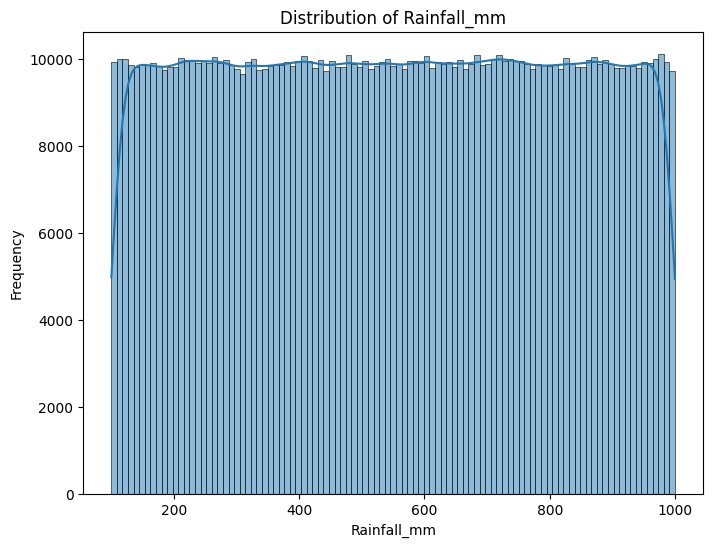

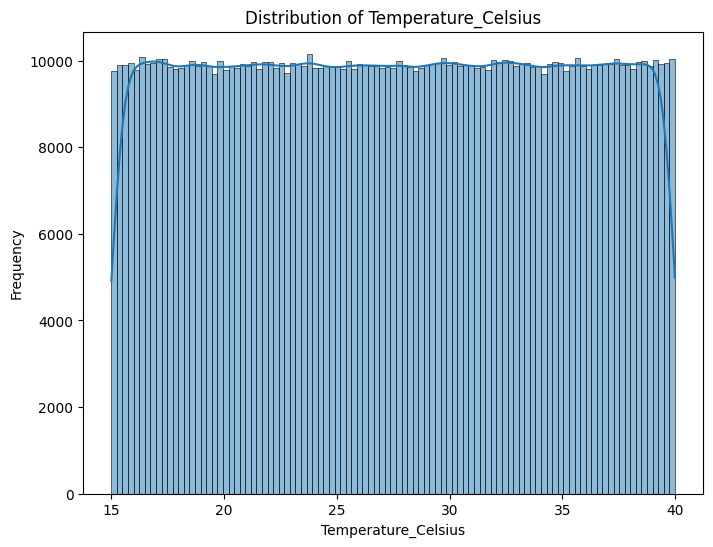

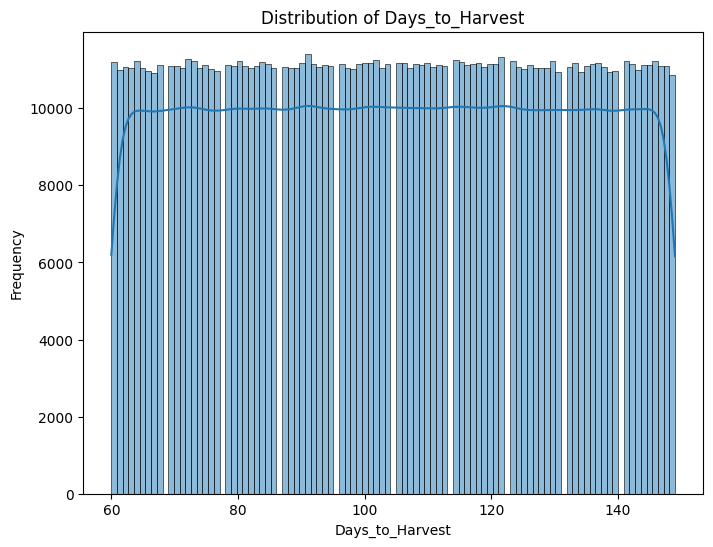

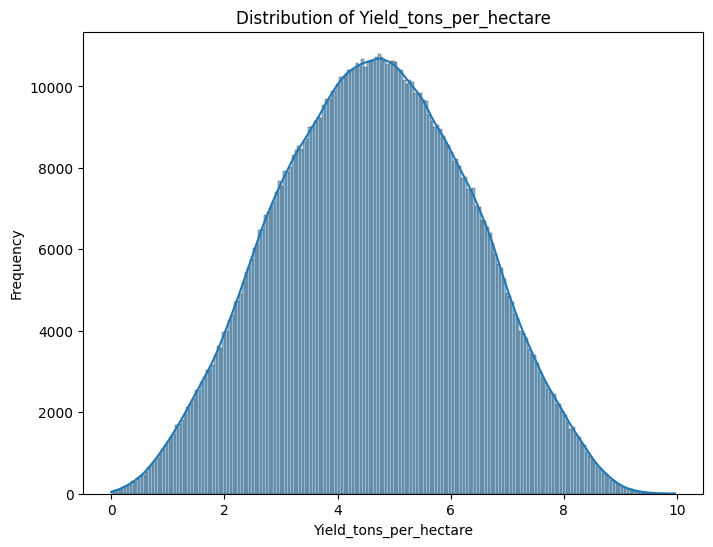

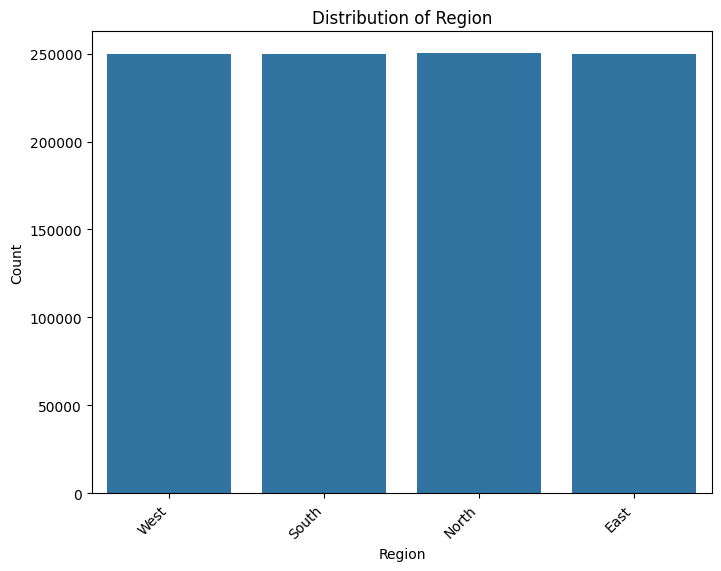

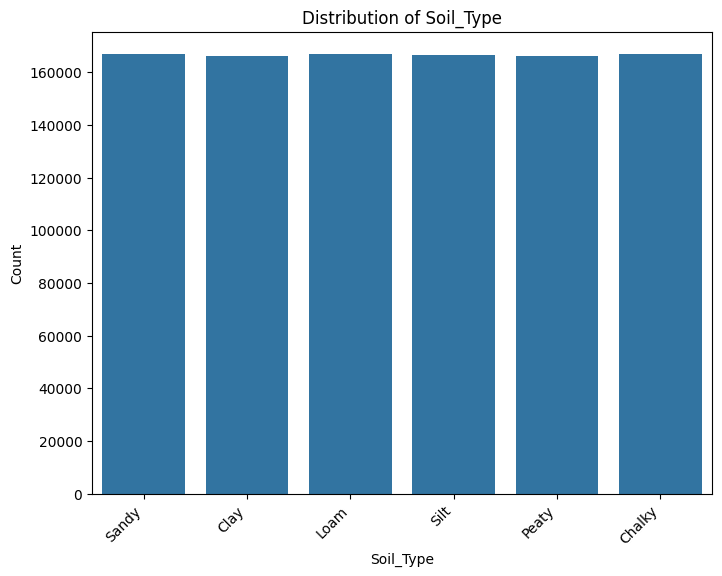

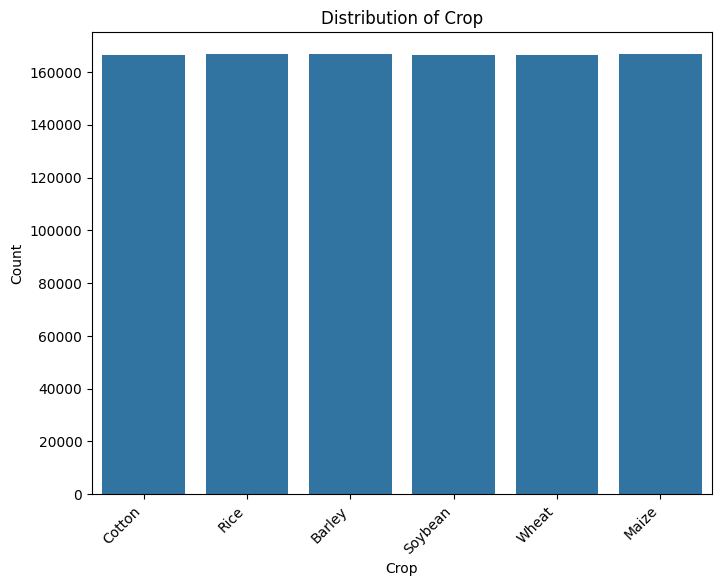

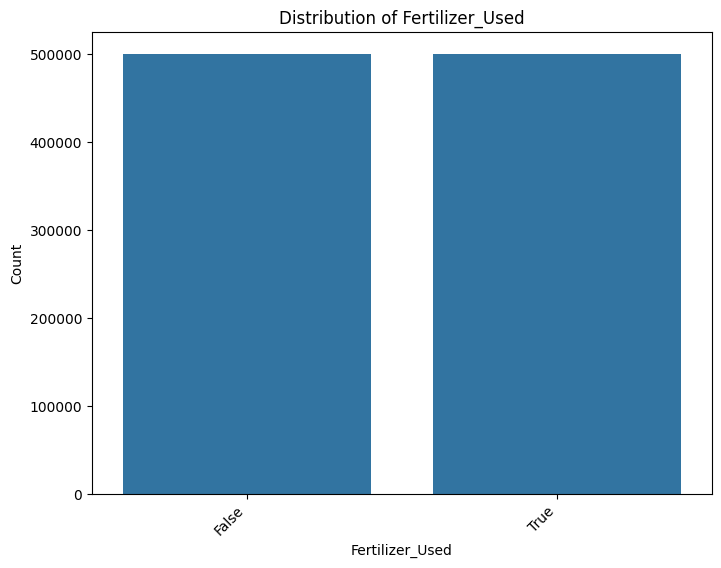

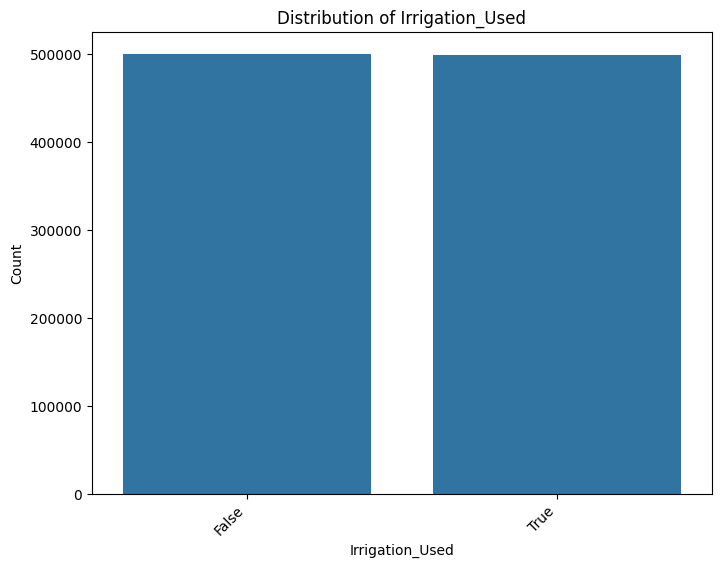

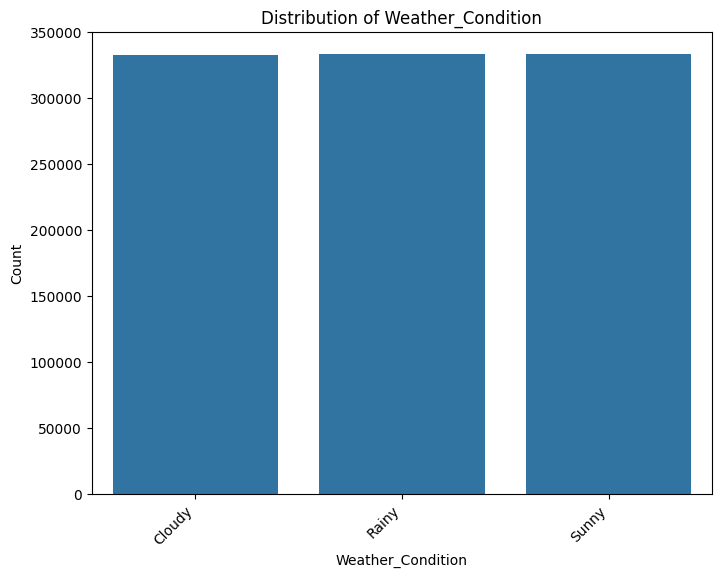

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pandas = df_spark.toPandas()

# Visualize the distribution of each numerical feature
numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_pandas[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of categorical features
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition'] # Changed 'Soil_type' to 'Soil_Type' to match the column name in df_pandas


for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df_pandas)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

In [ ]:

from pyspark.sql.functions import col, sum

df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns]).show()

+------+---------+----+-----------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|Region|Soil_Type|Crop|Rainfall_mm|Temperature_Celsius|Fertilizer_Used|Irrigation_Used|Weather_Condition|Days_to_Harvest|Yield_tons_per_hectare|
+------+---------+----+-----------+-------------------+---------------+---------------+-----------------+---------------+----------------------+
|     0|        0|   0|          0|                  0|              0|              0|                0|              0|                     0|
+------+---------+----+-----------+-------------------+---------------+---------------+-----------------+---------------+----------------------+



Dataset tidak memiliki missing values (semua kolom memiliki data lengkap).


## String Indexer

In [ ]:
from pyspark.sql.functions import col

df_spark = df_spark.withColumn("Fertilizer_Num", col("Fertilizer_Used").cast("integer")) \
               .withColumn("Irrigation_Num", col("Irrigation_Used").cast("integer"))


In [ ]:
df_spark.printSchema()

root
 |-- Region: string (nullable = true)
 |-- Soil_Type: string (nullable = true)
 |-- Crop: string (nullable = true)
 |-- Rainfall_mm: double (nullable = true)
 |-- Temperature_Celsius: double (nullable = true)
 |-- Fertilizer_Used: boolean (nullable = true)
 |-- Irrigation_Used: boolean (nullable = true)
 |-- Weather_Condition: string (nullable = true)
 |-- Days_to_Harvest: integer (nullable = true)
 |-- Yield_tons_per_hectare: double (nullable = true)
 |-- Fertilizer_Num: integer (nullable = true)
 |-- Irrigation_Num: integer (nullable = true)



In [ ]:
from pyspark.ml.feature import StringIndexer

region_indexer = StringIndexer(inputCol="Region", outputCol="Region_Index")
soil_type_indexer = StringIndexer(inputCol="Soil_Type", outputCol="Soil_Type_Index")
weather_indexer = StringIndexer(inputCol="Weather_Condition", outputCol="Weather_Index")
crop_indexer = StringIndexer(inputCol="Crop", outputCol="Crop_Index")

df_spark = region_indexer.fit(df_spark).transform(df_spark)
df_spark = soil_type_indexer.fit(df_spark).transform(df_spark)
df_spark = weather_indexer.fit(df_spark).transform(df_spark)
df_spark = crop_indexer.fit(df_spark).transform(df_spark)

In [ ]:
df_spark.show()

+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+--------------+--------------+------------+---------------+-------------+----------+
|Region|Soil_Type|   Crop|       Rainfall_mm|Temperature_Celsius|Fertilizer_Used|Irrigation_Used|Weather_Condition|Days_to_Harvest|Yield_tons_per_hectare|Fertilizer_Num|Irrigation_Num|Region_Index|Soil_Type_Index|Weather_Index|Crop_Index|
+------+---------+-------+------------------+-------------------+---------------+---------------+-----------------+---------------+----------------------+--------------+--------------+------------+---------------+-------------+----------+
|  West|    Sandy| Cotton| 897.0772391101236| 27.676966373377603|          false|           true|           Cloudy|            122|     6.555816258223593|             0|             1|         1.0|            0.0|          2.0|       4.0|
| South|     Clay|   Rice| 992.6732816189208

In [ ]:
selected_features = ["Region_Index", "Soil_Type_Index", "Crop_Index", "Rainfall_mm", "Temperature_Celsius", "Fertilizer_Num", "Irrigation_Num", "Weather_Index", "Days_to_Harvest"]
selected_features

['Region_Index',
 'Soil_Type_Index',
 'Crop_Index',
 'Rainfall_mm',
 'Temperature_Celsius',
 'Fertilizer_Num',
 'Irrigation_Num',
 'Weather_Index',
 'Days_to_Harvest']

In [ ]:
from pyspark.sql.functions import col

df_selected = df_spark.select(
    *selected_features,
    "Yield_tons_per_hectare"
)

df_selected.show()

+------------+---------------+----------+------------------+-------------------+--------------+--------------+-------------+---------------+----------------------+
|Region_Index|Soil_Type_Index|Crop_Index|       Rainfall_mm|Temperature_Celsius|Fertilizer_Num|Irrigation_Num|Weather_Index|Days_to_Harvest|Yield_tons_per_hectare|
+------------+---------------+----------+------------------+-------------------+--------------+--------------+-------------+---------------+----------------------+
|         1.0|            0.0|       4.0| 897.0772391101236| 27.676966373377603|             0|             1|          2.0|            122|     6.555816258223593|
|         2.0|            4.0|       1.0| 992.6732816189208|  18.02614225436302|             1|             1|          1.0|            140|       8.5273409063236|
|         0.0|            1.0|       2.0| 147.9980252926104|  29.79404241557257|             0|             0|          0.0|            106|     1.127443335982929|
|         0.0|  

## Normalisasi


In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col, min, max, udf, lit
from pyspark.sql.types import DoubleType

# Calculate min and max for normalization
min_max_values = df_selected.select(min("Rainfall_mm"), max("Rainfall_mm"), min("Temperature_Celsius"), max("Temperature_Celsius")).collect()[0]

min_rainfall = min_max_values[0]
max_rainfall = min_max_values[1]
min_temp = min_max_values[2]
max_temp = min_max_values[3]

# Define the normalization function
def normalize(value, min_val, max_val):
    if max_val - min_val == 0:
      return 0 # Handle cases where min and max are equal
    return (value - min_val) / (max_val - min_val)

# Apply normalization to Rainfall_mm and Temperature_Celsius
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

normalize_udf = udf(normalize, DoubleType())

df_normalized = df_selected.withColumn("Rainfall_mm_normalized", normalize_udf(col("Rainfall_mm"), lit(min_rainfall), lit(max_rainfall))) \
                           .withColumn("Temperature_Celsius_normalized", normalize_udf(col("Temperature_Celsius"), lit(min_temp), lit(max_temp)))

df_normalized.show()


+------------+---------------+----------+------------------+-------------------+--------------+--------------+-------------+---------------+----------------------+----------------------+------------------------------+
|Region_Index|Soil_Type_Index|Crop_Index|       Rainfall_mm|Temperature_Celsius|Fertilizer_Num|Irrigation_Num|Weather_Index|Days_to_Harvest|Yield_tons_per_hectare|Rainfall_mm_normalized|Temperature_Celsius_normalized|
+------------+---------------+----------+------------------+-------------------+--------------+--------------+-------------+---------------+----------------------+----------------------+------------------------------+
|         1.0|            0.0|       4.0| 897.0772391101236| 27.676966373377603|             0|             1|          2.0|            122|     6.555816258223593|    0.8856431343528213|             0.507078050265546|
|         2.0|            4.0|       1.0| 992.6732816189208|  18.02614225436302|             1|             1|          1.0|    

In [ ]:
selected_features = ["Region_Index", "Soil_Type_Index", "Crop_Index", "Rainfall_mm_normalized", "Temperature_Celsius_normalized", "Fertilizer_Num", "Irrigation_Num", "Weather_Index", "Days_to_Harvest"]
selected_features

['Region_Index',
 'Soil_Type_Index',
 'Crop_Index',
 'Rainfall_mm_normalized',
 'Temperature_Celsius_normalized',
 'Fertilizer_Num',
 'Irrigation_Num',
 'Weather_Index',
 'Days_to_Harvest']

In [ ]:
from pyspark.sql.functions import col

df_selected = df_normalized.select(
    *selected_features,
    "Yield_tons_per_hectare"
)

df_selected.show()

+------------+---------------+----------+----------------------+------------------------------+--------------+--------------+-------------+---------------+----------------------+
|Region_Index|Soil_Type_Index|Crop_Index|Rainfall_mm_normalized|Temperature_Celsius_normalized|Fertilizer_Num|Irrigation_Num|Weather_Index|Days_to_Harvest|Yield_tons_per_hectare|
+------------+---------------+----------+----------------------+------------------------------+--------------+--------------+-------------+---------------+----------------------+
|         1.0|            0.0|       4.0|    0.8856431343528213|             0.507078050265546|             0|             1|          2.0|            122|     6.555816258223593|
|         2.0|            4.0|       1.0|    0.9918612895834579|           0.12104450617252964|             1|             1|          1.0|            140|       8.5273409063236|
|         0.0|            1.0|       2.0|   0.05333030920642563|            0.5917612190399851|          

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Assemble features into a vector
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
output = assembler.transform(df_selected)

# Model

In [ ]:
modeldata = output.select("features","Yield_tons_per_hectare")

In [ ]:
modeldata.show()

+--------------------+----------------------+
|            features|Yield_tons_per_hectare|
+--------------------+----------------------+
|[1.0,0.0,4.0,0.88...|     6.555816258223593|
|[2.0,4.0,1.0,0.99...|       8.5273409063236|
|[0.0,1.0,2.0,0.05...|     1.127443335982929|
|[0.0,0.0,5.0,0.98...|     6.517572507555278|
|[2.0,3.0,3.0,0.70...|     7.248251218445701|
|[2.0,3.0,5.0,0.77...|     5.898416311841461|
|[1.0,4.0,3.0,0.28...|     2.652391664619867|
|[2.0,0.0,1.0,0.37...|    5.8295423488104605|
|[0.0,3.0,3.0,0.09...|    2.9437164569313867|
|[1.0,0.0,3.0,0.32...|    3.7072931271974823|
|[0.0,5.0,3.0,0.31...|     2.564442460083202|
|[3.0,0.0,4.0,0.05...|     4.367612094467675|
|[2.0,5.0,4.0,0.56...|      6.52518615986143|
|[3.0,4.0,2.0,0.92...|     6.493030751726615|
|[0.0,5.0,2.0,0.57...|     4.573219247646045|
|[3.0,2.0,1.0,0.86...|     5.839291310818685|
|[3.0,5.0,3.0,0.76...|     4.366880610019926|
|[0.0,4.0,4.0,0.35...|     4.858924380158361|
|[0.0,0.0,2.0,0.97...|     5.77809

In [ ]:
train, test = modeldata.randomSplit([0.8, 0.2], seed=42)

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='Yield_tons_per_hectare')

In [ ]:
model = lr.fit(train)

In [ ]:
model.coefficients, model.intercept

(DenseVector([0.0001, 0.0002, 0.0001, 4.4962, 0.4979, 1.5001, 1.1994, -0.0005, 0.0]),
 0.8011652513077655)

In [ ]:
import pandas as pd

In [ ]:
coeff = model.coefficients

pd.DataFrame({"Variable Names":selected_features, "Coefficients":coeff})

,Variable Names,Coefficients
0,Region_Index,0.000078
1,Soil_Type_Index,0.000205
2,Crop_Index,0.000146
3,Rainfall_mm_normalized,4.496176
4,Temperature_Celsius_normalized,0.497867
5,Fertilizer_Num,1.500146
6,Irrigation_Num,1.199362
7,Weather_Index,-0.000517
8,Days_to_Harvest,0.000019


In [ ]:
y_pred = model.transform(test.select('features'))

y_pred.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|(9,[0,3,4,8],[1.0...|0.9398782951086573|
|(9,[0,3,4,8],[1.0...|1.3368103013411214|
|(9,[0,3,4,8],[1.0...|1.4201980213224177|
|(9,[0,3,4,8],[1.0...|1.2765554661232668|
|(9,[0,3,4,8],[1.0...|1.1994563916551477|
|(9,[0,3,4,8],[1.0...| 1.185020965422583|
|(9,[0,3,4,8],[1.0...|1.6990802618651204|
|(9,[0,3,4,8],[1.0...|1.5511864754253395|
|(9,[0,3,4,8],[1.0...|1.6181876830251576|
|(9,[0,3,4,8],[1.0...|1.6100453513977757|
|(9,[0,3,4,8],[1.0...|1.8967326070680177|
|(9,[0,3,4,8],[1.0...|  1.69392385768188|
|(9,[0,3,4,8],[1.0...|2.0938384261901852|
|(9,[0,3,4,8],[1.0...| 2.180424512337902|
|(9,[0,3,4,8],[1.0...| 2.270367475656591|
|(9,[0,3,4,8],[1.0...|2.3839287918924046|
|(9,[0,3,4,8],[1.0...|2.4694331515874657|
|(9,[0,3,4,8],[1.0...| 2.405967212978572|
|(9,[0,3,4,8],[1.0...|2.9835098702304688|
|(9,[0,3,4,8],[1.0...|2.8076158639841546|
+--------------------+------------

In [ ]:
res = model.evaluate(test)

In [ ]:
print(f"""
Linear Regression Results Report
==================================
RMSE:\t {res.rootMeanSquaredError}
MAE:\t {res.meanAbsoluteError}
R2:\t {res.r2}
Adj R2:\t{res.r2adj}
==================================
"""
)


Linear Regression Results Report
RMSE:	 0.5003917455638616
MAE:	 0.39955118040249693
R2:	 0.912749220535371
Adj R2:	0.9127452946821389



In [ ]:
res.predictions.show()

+--------------------+----------------------+------------------+
|            features|Yield_tons_per_hectare|        prediction|
+--------------------+----------------------+------------------+
|(9,[0,3,4,8],[1.0...|    0.3759977071799543|0.9398782951086573|
|(9,[0,3,4,8],[1.0...|    1.9920180009153556|1.3368103013411214|
|(9,[0,3,4,8],[1.0...|    1.7897558550876167|1.4201980213224177|
|(9,[0,3,4,8],[1.0...|    1.6231380490835172|1.2765554661232668|
|(9,[0,3,4,8],[1.0...|    1.6763124419128461|1.1994563916551477|
|(9,[0,3,4,8],[1.0...|    0.6554471395148171| 1.185020965422583|
|(9,[0,3,4,8],[1.0...|    1.9351869579227896|1.6990802618651204|
|(9,[0,3,4,8],[1.0...|     1.488463638153227|1.5511864754253395|
|(9,[0,3,4,8],[1.0...|    1.7919338519883028|1.6181876830251576|
|(9,[0,3,4,8],[1.0...|    1.6670341237563355|1.6100453513977757|
|(9,[0,3,4,8],[1.0...|    1.7564601256620964|1.8967326070680177|
|(9,[0,3,4,8],[1.0...|    0.9844949628770984|  1.69392385768188|
|(9,[0,3,4,8],[1.0...|   

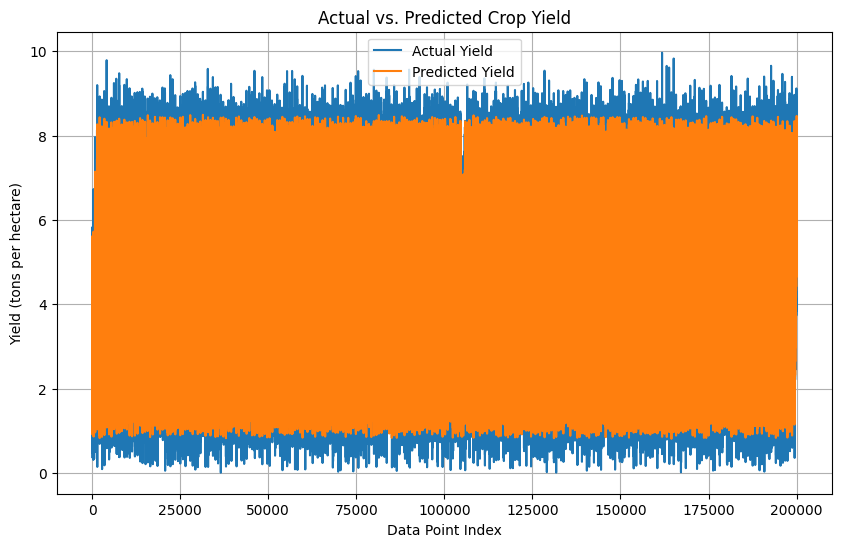

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'res.predictions' is your DataFrame with predicted and actual values
predictions_df = res.predictions.toPandas()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.index, predictions_df['Yield_tons_per_hectare'], label='Actual Yield')
plt.plot(predictions_df.index, predictions_df['prediction'], label='Predicted Yield')
plt.xlabel('Data Point Index')
plt.ylabel('Yield (tons per hectare)')
plt.title('Actual vs. Predicted Crop Yield')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions_df

,features,Yield_tons_per_hectare,prediction
0,"(1.0, 0.0, 0.0, 0.008232246509462715, 0.201479...",0.375998,0.939878
1,"(1.0, 0.0, 0.0, 0.019857550253014816, 0.891649...",1.992018,1.336810
2,"(1.0, 0.0, 0.0, 0.03196321062633687, 0.9516592...",1.789756,1.420198
3,"(1.0, 0.0, 0.0, 0.05191892924185881, 0.4830763...",1.623138,1.276555
4,"(1.0, 0.0, 0.0, 0.06280575509428664, 0.2277547...",1.676312,1.199456
...,...,...,...
200027,"[3.0, 5.0, 5.0, 0.9901506171560729, 0.91891841...",5.611476,5.715113
200028,"[3.0, 5.0, 5.0, 0.995476900075913, 0.099036286...",8.907128,8.028293
200029,"[3.0, 5.0, 5.0, 0.9964387415443324, 0.52991106...",7.805468,8.247785
200030,"[3.0, 5.0, 5.0, 0.9974286649448852, 0.95561155...",8.650924,8.464803


In [ ]:
from pyspark.ml.stat import Correlation

# Calculate correlation matrix
correlation_matrix = Correlation.corr(output, "features", "pearson").collect()[0][0]
print(correlation_matrix)

# Print the correlation matrix
print("Correlation Matrix:")
correlation_matrix.toArray().tolist()

# Extract correlation with Yield_tons_per_hectare
yield_correlation = correlation_matrix.toArray()[:,-1]

# Print the correlation with Yield_tons_per_hectare for each feature
for i in range(len(selected_features)):
    print(f"Correlation between {selected_features[i]} and Yield_tons_per_hectare: {yield_correlation[i]}")


DenseMatrix([[ 1.00000000e+00, -1.19093079e-03,  2.85050962e-03,
              -1.95299821e-03,  7.10937485e-05,  2.59094283e-04,
              -4.59943817e-04, -8.98506340e-04,  6.40563481e-04],
             [-1.19093079e-03,  1.00000000e+00, -1.12755851e-03,
               2.10738425e-04,  9.92140407e-04, -1.79166891e-03,
               3.20537110e-04, -7.62000710e-04,  1.37304466e-03],
             [ 2.85050962e-03, -1.12755851e-03,  1.00000000e+00,
               9.67977548e-04,  1.75514032e-03,  8.86648035e-04,
               1.42767337e-03,  1.71510985e-03, -4.15694079e-04],
             [-1.95299821e-03,  2.10738425e-04,  9.67977548e-04,
               1.00000000e+00, -3.70530508e-04, -1.44543077e-03,
              -9.36849451e-04, -1.39488556e-03, -2.67804079e-03],
             [ 7.10937485e-05,  9.92140407e-04,  1.75514032e-03,
              -3.70530508e-04,  1.00000000e+00,  2.18887773e-03,
              -6.38274118e-04,  8.21920967e-04, -7.53919956e-04],
             [ 2.590